# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files.


In [2]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import seaborn as sns

In [3]:
# import custom functions
import anomaly_function as func # imports the function
import model_figures as func2

In [4]:
# use this to reload the function file if I make any edits to it
func = reload(func) 

In [5]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


In [6]:
models_tas = func.read_models(institution_dir, tas_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [7]:
models_pr = func.read_models(institution_dir, pr_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [8]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
#chekc that the models are the same for both variables and if so print True
models_tas.model.equals(models_pr.model)

True

In [9]:
# print final model list
print(f'Here is the final list of {len(models_tas.model.data)} models:')
print(models_tas.model.data)

Here is the final list of 40 models:
['MPI-ESM-1-2-HAM' 'NESM3' 'ACCESS-CM2' 'MPI-ESM1-2-LR' 'IPSL-CM6A-LR'
 'CAS-ESM2-0' 'FGOALS-f3-L' 'FGOALS-g3' 'BCC-ESM1' 'BCC-CSM2-MR' 'CIESM'
 'TaiESM1' 'KACE-1-0-G' 'CMCC-CM2-SR5' 'GISS-E2-1-G-CC' 'GISS-E2-1-H'
 'GISS-E2-1-G' 'AWI-CM-1-1-MR' 'AWI-ESM-1-1-LR' 'MIROC6' 'MRI-ESM2-0'
 'FIO-ESM-2-0' 'CanESM5' 'ACCESS-ESM1-5' 'GFDL-CM4' 'GFDL-ESM4' 'E3SM-1-1'
 'E3SM-1-1-ECA' 'INM-CM4-8' 'INM-CM5-0' 'EC-Earth3-Veg-LR' 'EC-Earth3'
 'NorCPM1' 'NorESM2-MM' 'CAMS-CSM1-0' 'CESM2' 'CESM2-WACCM' 'CESM2-FV2'
 'CESM2-WACCM-FV2' 'SAM0-UNICON']


In [10]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

,Array,Chunk
Bytes,9.12 GB,228.10 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,325 Tasks,40 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,18.25 GB,456.19 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,365 Tasks,40 Chunks
Type,float64,numpy.ndarray


Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  
## Select out regions and eruption dates

In [11]:
# area weighting 
models_w = models*np.cos(models.lat*(np.pi/180))

In [12]:
# eruption date
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_pre5yrs = ['1878-08','1897-10', '1958-03', '1977-04', '1986-06']
e_pre3mon = ['1883-05','1902-7', '1962-12', '1982-01', '1991-03']
e_post5yrs = ['1888-08','1907-10', '1968-03', '1987-04', '1996-06']

In [13]:
# eruption names
volcanoes = ['Krakatau', 'Santa Maria','Agung','El Chichon', 'Pinatubo']

In [14]:
# select out hte 10 year time frame around each eruption (5yrs before and after)
# tas
Krakatau = models_w.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
SantaMaria = models_w.sel(time = slice(e_pre5yrs[1], e_post5yrs[1]))
Agung = models_w.sel(time = slice(e_pre5yrs[2], e_post5yrs[2]))
ElChicon = models_w.sel(time = slice(e_pre5yrs[3], e_post5yrs[3]))
Pinatubo = models_w.sel(time = slice(e_pre5yrs[4], e_post5yrs[4]))

In [15]:
# combine eruptions into one array


In [16]:
# select out the northern and sourhern hemisphere regions
Krakatau_SH = Krakatau.sel(lat=slice(-90,0))
Krakatau_NH = Krakatau.sel(lat=slice(0,90))

SantaMaria_SH = SantaMaria.sel(lat=slice(-90,0))
SantaMaria_NH = SantaMaria.sel(lat=slice(0,90))

Agung_SH = Agung.sel(lat=slice(-90,0))
Agung_NH = Agung.sel(lat=slice(0,90))

ElChicon_SH = ElChicon.sel(lat=slice(-90,0))
ElChicon_NH = ElChicon.sel(lat=slice(0,90))

Pinatubo_SH = Pinatubo.sel(lat=slice(-90,0))
Pinatubo_NH = Pinatubo.sel(lat=slice(0,90))

In [17]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [18]:
# this is where I use the land mask and select out the continents
# and I select the Australia region with a lon,lat box and the Eastern Australia region
Krakatau_aus = Krakatau.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Krakatau_EA = Krakatau.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

SantaMaria_aus = SantaMaria.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
SantaMaria_EA = SantaMaria.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

Agung_aus = Agung.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Agung_EA = Agung.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

ElChicon_aus = ElChicon.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
ElChicon_EA = ElChicon.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

Pinatubo_aus = Pinatubo.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Pinatubo_EA = Pinatubo.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

In [19]:
# use functions to calculate the monthly anomalies for the globe
K_mon_anom_Glob = func.monthly_anomaly(Krakatau, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_Glob = func.monthly_anomaly(SantaMaria, e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_Glob = func.monthly_anomaly(Agung, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_Glob = func.monthly_anomaly(ElChicon, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_Glob = func.monthly_anomaly(Pinatubo, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [20]:
# use functions to calculate the monthly anomalies for the SH
K_mon_anom_SH = func.monthly_anomaly(Krakatau_SH, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_SH = func.monthly_anomaly(SantaMaria_SH,  e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_SH = func.monthly_anomaly(Agung_SH, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_SH = func.monthly_anomaly(ElChicon_SH, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_SH = func.monthly_anomaly(Pinatubo_SH, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [21]:
# use functions to calculate the monthly anomalies for Aus 
K_mon_anom_Aus = func.monthly_anomaly(Krakatau_aus, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_Aus = func.monthly_anomaly(SantaMaria_aus, e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_Aus = func.monthly_anomaly(Agung_aus, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_Aus = func.monthly_anomaly(ElChicon_aus, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_Aus = func.monthly_anomaly(Pinatubo_aus, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [22]:
# use functions to calculate the monthly anomalies for EA 
K_mon_anom_EA = func.monthly_anomaly(Krakatau_EA, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_EA = func.monthly_anomaly(SantaMaria_EA, e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_EA = func.monthly_anomaly(Agung_EA, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_EA = func.monthly_anomaly(ElChicon_EA, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_EA = func.monthly_anomaly(Pinatubo_EA, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [23]:
# reset the time array so eruption time corresponds to 0 and store all eruptions in one composite array
composite_mon_Glob = func.reset_time(K_mon_anom_Glob, S_mon_anom_Glob, A_mon_anom_Glob, E_mon_anom_Glob, P_mon_anom_Glob, volcanoes)
composite_mon_SH = func.reset_time(K_mon_anom_SH, S_mon_anom_SH, A_mon_anom_SH, E_mon_anom_SH, P_mon_anom_SH, volcanoes)
composite_mon_Aus = func.reset_time(K_mon_anom_Aus, S_mon_anom_Aus, A_mon_anom_Aus, E_mon_anom_Aus, P_mon_anom_Aus, volcanoes)
composite_mon_EA = func.reset_time(K_mon_anom_EA, S_mon_anom_EA, A_mon_anom_EA, E_mon_anom_EA, P_mon_anom_EA, volcanoes)


In [24]:
# take the mean in lat and lon for monthly anomalies
composite_mean_Glob = composite_mon_Glob.mean(dim=('lat','lon'))
composite_mean_SH = composite_mon_SH.mean(dim=('lat','lon'))
composite_mean_Aus = composite_mon_Aus.mean(dim=('lat','lon'))
composite_mean_EA = composite_mon_EA.mean(dim=('lat','lon'))

In [25]:
# calculate the monthly model mean for monthly anomalies
composite_mmm_Glob = composite_mean_Glob.mean(dim='model')
composite_mmm_SH = composite_mean_SH.mean(dim='model')
composite_mmm_Aus = composite_mean_Aus.mean(dim='model')
composite_mmm_EA = composite_mean_EA.mean(dim='model')

In [26]:
# take the composite over all volcanoes
V_composite_mmm_Glob = composite_mmm_Glob.mean(dim='volcano')
V_composite_mmm_SH = composite_mmm_SH.mean(dim='volcano')
V_composite_mmm_Aus = composite_mmm_Aus.mean(dim='volcano')
V_composite_mmm_EA = composite_mmm_EA.mean(dim='volcano')

In [27]:
# calculate percentile
# 10th percentile
p10_Glob = composite_mean_Glob.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_SH = composite_mean_SH.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_Aus = composite_mean_Aus.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_EA = composite_mean_EA.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])

# 90th percentile
p90_Glob = composite_mean_Glob.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_SH = composite_mean_SH.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_Aus = composite_mean_Aus.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_EA = composite_mean_EA.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])

In [28]:
# calculate standard deviation
std_Glob = func.std_bounds_MV(composite_mean_Glob, V_composite_mmm_Glob)
std_SH = func.std_bounds_MV(composite_mean_SH, V_composite_mmm_SH)
std_Aus = func.std_bounds_MV(composite_mean_Aus, V_composite_mmm_Aus)
std_EA = func.std_bounds_MV(composite_mean_EA, V_composite_mmm_EA)

# check difference between std and per
## Figures

In [30]:
blues = sns.color_palette("Blues_r")
reds = sns.color_palette("Reds_r")

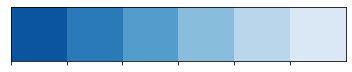

In [31]:
sns.palplot(sns.color_palette("Blues_r"))

In [46]:
func2 = reload(func2)

In [34]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

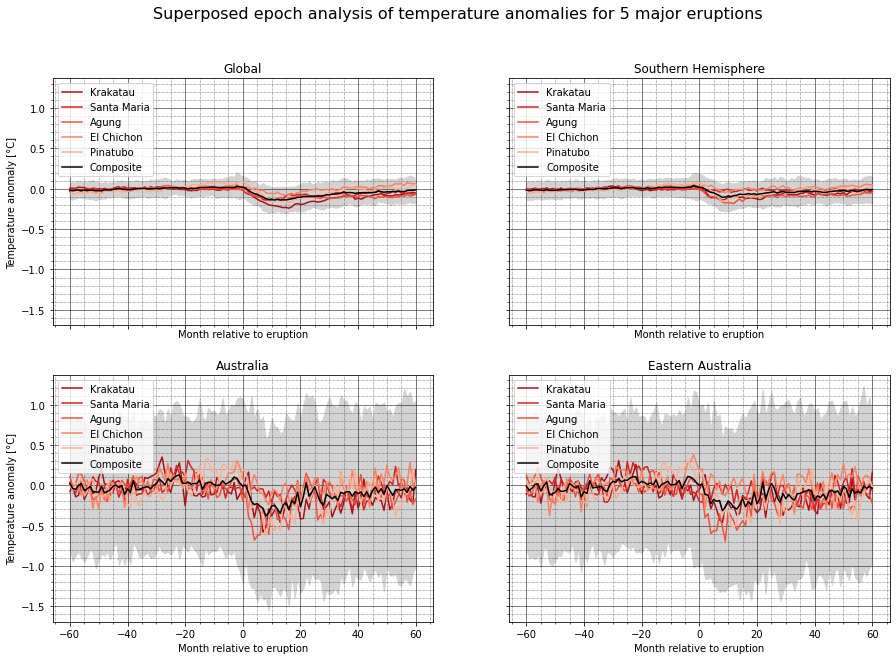

In [35]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))

# make subplots for each region
func2.SEA_plots(composite_mmm_Glob.tas, V_composite_mmm_Glob.tas, p10_Glob.tas, p90_Glob.tas, reds, ax = axes[0,0])
func2.SEA_plots(composite_mmm_SH.tas, V_composite_mmm_SH.tas, p10_SH.tas, p90_SH.tas, reds, ax = axes[0,1])
func2.SEA_plots(composite_mmm_Aus.tas, V_composite_mmm_Aus.tas, p10_Aus.tas, p90_Aus.tas, reds, ax = axes[1,0])
func2.SEA_plots(composite_mmm_EA.tas, V_composite_mmm_EA.tas, p10_EA.tas, p90_EA.tas, reds, ax = axes[1,1])

# set axis labels and subplot titles
axes[0,0].set(ylabel=f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel=f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

plt.savefig('SEA_mon_tas.png', dpi=300)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

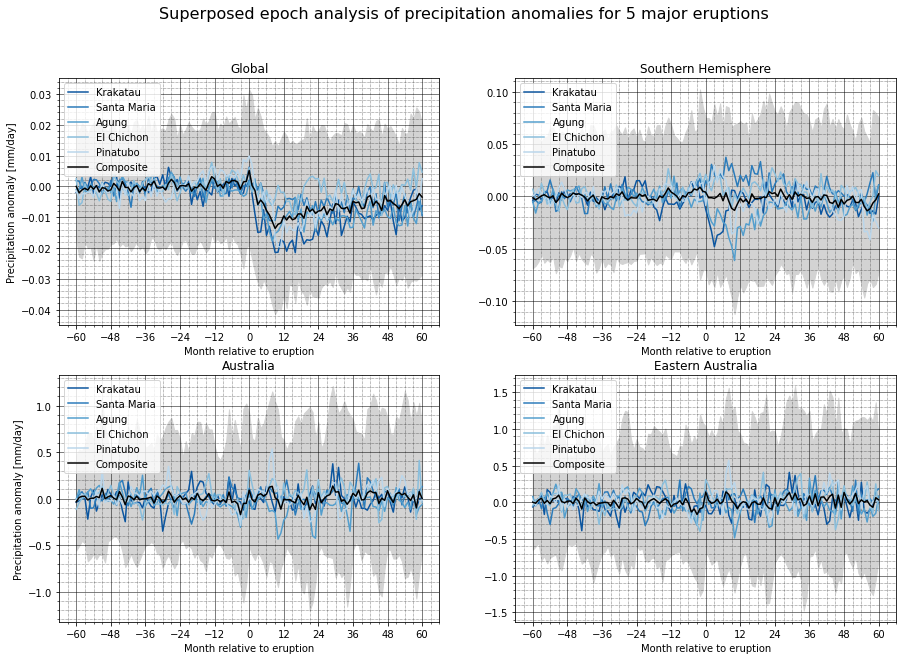

In [47]:
# plot monthly anomalies of precipitation as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# make subplots for each region
func2.SEA_plots(composite_mmm_Glob.pr, V_composite_mmm_Glob.pr, p10_Glob.pr, p90_Glob.pr, blues, ax = axes[0,0])
func2.SEA_plots(composite_mmm_SH.pr, V_composite_mmm_SH.pr, p10_SH.pr, p90_SH.pr, blues, ax = axes[0,1])
func2.SEA_plots(composite_mmm_Aus.pr, V_composite_mmm_Aus.pr, p10_Aus.pr, p90_Aus.pr, blues, ax = axes[1,0])
func2.SEA_plots(composite_mmm_EA.pr, V_composite_mmm_EA.pr, p10_EA.pr, p90_EA.pr, blues, ax = axes[1,1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0,0].set(ylabel='Precipitation anomaly [mm/day]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel='Precipitation anomaly [mm/day]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

fig.suptitle('Superposed epoch analysis of precipitation anomalies for 5 major eruptions', size=16)

plt.savefig('SEA_mon_pr.png', dpi=300)